In [1]:
# -------------------------- LIBRARIES NECESSARY IN THIS PROJECT  -------------------------- #

import pandas as pd
import numpy as np
import seaborn as sns
from datetime import *
import zipfile
import pylab as plt

# -------------------------- FUNCTIONS -------------------------- #

def getDataSet(data_path):
    return pd.read_csv(data_path)

def plotNaNValuesColums(dataSet):
    # Gets the dataSet Columns with null values
    #  and the Percentual of null values per column    
    missing_values = (dataSet.isnull().sum() / len(dataSet)) * 100    
    missing_values = missing_values[missing_values > 0]
    missing_values.sort_values(inplace=True)   

    missing_values = missing_values.to_frame()
    missing_values.columns = ['Percentual']
    missing_values.index.names = ['Name']
    missing_values['Column'] = missing_values.index

    # Plots the graph
    sns.set(style="whitegrid", color_codes=True)
    sns.barplot(x = 'Column', y = 'Percentual', data=missing_values)
    plt.xticks(rotation = 90)
    plt.show()
    print(missing_values)
    
def plotNotNaNValuesColums(dataSet):
    # Gets the dataSet Columns with null values
    #  and the Percentual of null values per column    
    missing_values = (dataSet.notnull().sum() / len(dataSet)) * 100    
    missing_values = missing_values[missing_values > 0]
    missing_values.sort_values(inplace=True)   

    missing_values = missing_values.to_frame()
    missing_values.columns = ['Percentual']
    missing_values.index.names = ['Name']
    missing_values['Column'] = missing_values.index

    # Plots the graph
    sns.set(style="whitegrid", color_codes=True)
    sns.barplot(x = 'Column', y = 'Percentual', data=missing_values)
    plt.xticks(rotation = 90)
    plt.show()
    print(missing_values)

## Upload dataSets

In [2]:
# -------------------------- PATH OF THE DATASETS USED IN THE PROJECT  -------------------------- #
zf = zipfile.ZipFile('../dataSets/leapIn.zip')

invoices_claims_last_actived_all_fields = pd.read_csv(zf.open('Invoices_Claims_Last_Actived.csv'))
invoices_claims_last_completed_all_fields = pd.read_csv(zf.open('Invoices_Claims_Last_Completed.csv'))
plans_budgets_all_fields = pd.read_csv(zf.open('Plans_Budgets.csv'))
members_supported_all_fields = pd.read_csv(zf.open('Members_Supported.csv')) 
#providers_all_fields = pd.read_csv(zf.open('/Providers.csv'))

C:\Users\dttt1\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Data manipulation and cleansing<a name="preparation"></a>

### Members dataset cleasing

In [3]:
# Check the dataSet fields
members_supported_all_fields.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               6019 non-null   int64  
 1   member_key       6019 non-null   object 
 2   date_of_birth    6019 non-null   object 
 3   first_name       6019 non-null   object 
 4   last_name        6019 non-null   object 
 5   price_zone_code  6019 non-null   object 
 6   u_disabilities   1272 non-null   object 
 7   u_gender         5304 non-null   object 
 8   SA1              735 non-null    float64
 9   SA2              735 non-null    float64
 10  SA3              735 non-null    float64
 11  SA4              735 non-null    float64
dtypes: float64(4), int64(1), object(7)
memory usage: 399.8+ KB


In [4]:
members_supported_all_fields.head(4)

,id,member_key,date_of_birth,first_name,last_name,price_zone_code,u_disabilities,u_gender,SA1,SA2,SA3,SA4
0,1350,f8e1f640-c7f3-11ea-baa6-ebfe92aca975,1957-12-19,Aaron,Edney,Remote,Amputee,Female,NaN,NaN,NaN,NaN
1,435,df6fef80-c179-11ea-8a11-397bdc21f5a9,2002-11-04,Abba,Joskovitch,ACT_NSW_QLD_VIC,NaN,Female,NaN,NaN,NaN,NaN
2,3297,d4762b30-dcef-11ea-a5ac-61abce895864,2013-09-26,Abbe,Claridge,ACT_NSW_QLD_VIC,NaN,Male,NaN,NaN,NaN,NaN
3,3641,e03ed7f0-ddb7-11ea-a31a-7d25e47a5c0a,1969-12-15,Abbe,Kelloway,ACT_NSW_QLD_VIC,Mental health,Female,NaN,NaN,NaN,NaN


In [5]:
# Select just the fields to be used
df_members_supported = members_supported_all_fields[{"id"
                                                   , "member_key" 
                                                   , "first_name"
                                                   , "last_name"
                                                   , "price_zone_code"
                                                   , "u_disabilities"
                                                   , "SA1"
                                                   }]

# Rename some dataSet colums to create a name's pattern
df_members_supported.rename(columns={'id':'member_id'
                                   , 'u_disabilities':'disabilities'
                                    } , inplace = True)                                    

C:\Users\dttt1\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


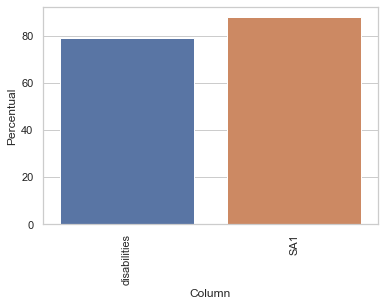

              Percentual        Column
Name                                  
disabilities   78.866921  disabilities
SA1            87.788669           SA1
C:\Users\dttt1\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [6]:
# Check if there any NaN Field
plotNaNValuesColums(df_members_supported)

# Although amount of null values in the columns is high they are keeped in the dataSet
#  And it is assigned 'Not Assigned' to the null values in u_disabilities and SA1
df_members_supported.loc[df_members_supported['disabilities'].isnull(),['disabilities']] = "NA"
df_members_supported.loc[df_members_supported['SA1'].isnull(),['SA1']] = "NA"

df_members_cleased = df_members_supported

### Plans and budgets dataset cleasing

In [7]:
# Check the dataSet fields
plans_budgets_all_fields.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69470 entries, 0 to 69469
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   member_key                69470 non-null  object 
 1   plan_key                  69470 non-null  object 
 2   plan_start_date           69470 non-null  object 
 3   plan_start_date.1         69470 non-null  object 
 4   status                    69470 non-null  object 
 5   id_budget                 69470 non-null  int64  
 6   budget_number             66164 non-null  object 
 7   opening_balance           19824 non-null  float64
 8   closing_balance           19824 non-null  float64
 9   level2_key                69470 non-null  object 
 10  level2_name               69470 non-null  object 
 11  level1_key                69470 non-null  object 
 12  level1_name               69470 non-null  object 
 13  item_category_level3_key  1213 non-null   object 
 14  budget

In [8]:
plans_budgets_all_fields.head(4)

,member_key,plan_key,plan_start_date,plan_start_date.1,status,id_budget,budget_number,opening_balance,closing_balance,level2_key,level2_name,level1_key,level1_name,item_category_level3_key,budget_level3_name,value_allocated_budget,value_remained_budget,status_budget
0,ef0ab4c0-891b-11ea-a119-35e8388a5f49,29b86641-62d2-4eb2-9222-311b16ef74cc,2020-04-24,2021-04-23,PLAN_DELIVERY_ACTIVE,1,55508918,NaN,NaN,7d0af57b-f597-11e9-bfb4-022d4762bb3c,Improved daily living skills,5874551b-f597-11e9-bfb4-022d4762bb3c,Capacity Building,NaN,NaN,8168.00,8168.00,CONFIRMED
1,6a535640-8b5c-11ea-9eec-315ed4b1385b,ea2cc969-6c3f-4dbc-9ebe-30df0c9f5b33,2020-04-20,2021-04-20,PLAN_DELIVERY_ACTIVE,2,55539563,NaN,NaN,7d0af57b-f597-11e9-bfb4-022d4762bb3c,Improved daily living skills,5874551b-f597-11e9-bfb4-022d4762bb3c,Capacity Building,NaN,NaN,7682.04,7682.04,CONFIRMED
2,6a535640-8b5c-11ea-9eec-315ed4b1385b,ea2cc969-6c3f-4dbc-9ebe-30df0c9f5b33,2020-04-20,2021-04-20,PLAN_DELIVERY_ACTIVE,3,55539563,NaN,NaN,7d0af5b1-f597-11e9-bfb4-022d4762bb3c,Consumables,58745466-f597-11e9-bfb4-022d4762bb3c,Core,NaN,NaN,300.00,300.00,CONFIRMED
3,472c17f0-9409-11ea-ba24-1f1ea52ce5bc,dd735ad0-05eb-42ce-91ba-36e1e032a67a,2019-09-11,2020-08-17,COMPLETED,4,55612635,NaN,NaN,7d0af57b-f597-11e9-bfb4-022d4762bb3c,Improved daily living skills,5874551b-f597-11e9-bfb4-022d4762bb3c,Capacity Building,NaN,NaN,6972.41,6972.41,CONFIRMED


In [9]:
# Select just the fields to be used
df_plans_budgets = plans_budgets_all_fields[{"member_key"
                                           , "plan_key"
                                           , "plan_start_date" 
                                           , "plan_start_date.1"
                                           , "status"
                                           , "budget_number"                                              
                                           , "level2_key"
                                           , "level2_name"
                                           , "level1_key"
                                           , "level1_name"
                                           , "item_category_level3_key"
                                           , "budget_level3_name"
                                           , "opening_balance"
                                           , "closing_balance"
                                           , "value_allocated_budget"
                                           , "status_budget"
                                           }]


# Rename some dataSet colums to create a name's pattern
df_plans_budgets.rename(columns={'plan_start_date.1':'plan_end_date'
                               , 'status':'plan_status'                               
                               , 'status_budget':'budget_status'
                               , 'value_allocated_budget':'budget_amount'
                               , 'level2_key':'budget_level2_key'
                               , 'level2_name':'budget_level2_name'
                               , 'level2_display_name':'budget_level2_display_name'
                               , 'level1_key':'budget_level1_key'
                               , 'level1_name':'budget_level1_name'
                               , 'item_category_level3_key':'budget_level3_key'
                               , 'level3_reference_number':'budget_level3_reference_number'
                                } , inplace = True)                            

C:\Users\dttt1\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [10]:
# Check the Budget's status in the dataSet
np.unique(df_plans_budgets['budget_status'])

array(['CONFIRMED', 'UNCONFIRMED'], dtype=object)

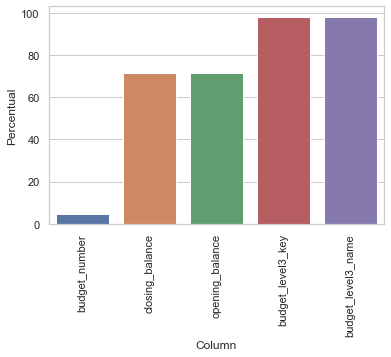

                    Percentual              Column
Name                                              
budget_number         4.758889       budget_number
closing_balance      71.463941     closing_balance
opening_balance      71.463941     opening_balance
budget_level3_key    98.253923   budget_level3_key
budget_level3_name   98.253923  budget_level3_name
None


In [11]:
# Check if there any Nan Field
print(plotNaNValuesColums(df_plans_budgets))

In [12]:
# Check some budget_number NaN Data to
#  Check these data have in commum
#   It is seen that when budget_number is null
#    opening_balance and closing_balance are not null
Null_budget_number = df_plans_budgets.loc[(df_plans_budgets['budget_number'].isna())]
Null_budget_number.head(4)

,plan_start_date,member_key,plan_status,budget_number,budget_level3_key,closing_balance,plan_key,opening_balance,budget_level2_key,budget_amount,budget_level1_key,plan_end_date,budget_status,budget_level1_name,budget_level3_name,budget_level2_name
63,2020-09-25,b3936f00-b462-11ea-9a7d-99d8a325124d,COMPLETED,NaN,NaN,2833.24,b4ebac00-b462-11ea-a898-85942aaecf99,0.0,7d0af71b-f597-11e9-bfb4-022d4762bb3c,9084.16,58745466-f597-11e9-bfb4-022d4762bb3c,2020-03-23,CONFIRMED,Core,NaN,Assistance with daily living
64,2020-09-25,b3936f00-b462-11ea-9a7d-99d8a325124d,COMPLETED,NaN,NaN,232.74,b4ebac00-b462-11ea-a898-85942aaecf99,0.0,7d0af5b1-f597-11e9-bfb4-022d4762bb3c,2720.20,58745466-f597-11e9-bfb4-022d4762bb3c,2020-03-23,CONFIRMED,Core,NaN,Consumables
65,2020-09-25,b3936f00-b462-11ea-9a7d-99d8a325124d,COMPLETED,NaN,NaN,7760.68,b4ebac00-b462-11ea-a898-85942aaecf99,0.0,7d0af53b-f597-11e9-bfb4-022d4762bb3c,23353.72,58745466-f597-11e9-bfb4-022d4762bb3c,2020-03-23,CONFIRMED,Core,NaN,Assistance with social and community participa...
66,2020-09-25,b3936f00-b462-11ea-9a7d-99d8a325124d,COMPLETED,NaN,NaN,6.25,b4ebac00-b462-11ea-a898-85942aaecf99,0.0,7d0af57b-f597-11e9-bfb4-022d4762bb3c,12182.38,5874551b-f597-11e9-bfb4-022d4762bb3c,2020-03-23,CONFIRMED,Capacity Building,NaN,Improved daily living skills


In [13]:
# Check some budget_number Not NaN Data to
#  Check these data have in commum
#   It is seen that when budget_number is null
#    opening_balance and closing_balance are null
Null_budget_number = df_plans_budgets.loc[(df_plans_budgets['budget_number'].notna())]
Null_budget_number.head(4)

,plan_start_date,member_key,plan_status,budget_number,budget_level3_key,closing_balance,plan_key,opening_balance,budget_level2_key,budget_amount,budget_level1_key,plan_end_date,budget_status,budget_level1_name,budget_level3_name,budget_level2_name
0,2020-04-24,ef0ab4c0-891b-11ea-a119-35e8388a5f49,PLAN_DELIVERY_ACTIVE,55508918,NaN,NaN,29b86641-62d2-4eb2-9222-311b16ef74cc,NaN,7d0af57b-f597-11e9-bfb4-022d4762bb3c,8168.00,5874551b-f597-11e9-bfb4-022d4762bb3c,2021-04-23,CONFIRMED,Capacity Building,NaN,Improved daily living skills
1,2020-04-20,6a535640-8b5c-11ea-9eec-315ed4b1385b,PLAN_DELIVERY_ACTIVE,55539563,NaN,NaN,ea2cc969-6c3f-4dbc-9ebe-30df0c9f5b33,NaN,7d0af57b-f597-11e9-bfb4-022d4762bb3c,7682.04,5874551b-f597-11e9-bfb4-022d4762bb3c,2021-04-20,CONFIRMED,Capacity Building,NaN,Improved daily living skills
2,2020-04-20,6a535640-8b5c-11ea-9eec-315ed4b1385b,PLAN_DELIVERY_ACTIVE,55539563,NaN,NaN,ea2cc969-6c3f-4dbc-9ebe-30df0c9f5b33,NaN,7d0af5b1-f597-11e9-bfb4-022d4762bb3c,300.00,58745466-f597-11e9-bfb4-022d4762bb3c,2021-04-20,CONFIRMED,Core,NaN,Consumables
3,2019-09-11,472c17f0-9409-11ea-ba24-1f1ea52ce5bc,COMPLETED,55612635,NaN,NaN,dd735ad0-05eb-42ce-91ba-36e1e032a67a,NaN,7d0af57b-f597-11e9-bfb4-022d4762bb3c,6972.41,5874551b-f597-11e9-bfb4-022d4762bb3c,2020-08-17,CONFIRMED,Capacity Building,NaN,Improved daily living skills


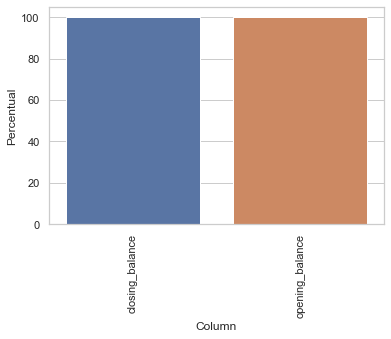

                 Percentual           Column
Name                                        
closing_balance       100.0  closing_balance
opening_balance       100.0  opening_balance


In [14]:
# Plot the percentual of opening_balance and closing_balance not Nan with budget_number Nan
Null_budget_number = df_plans_budgets[{'opening_balance', 'closing_balance'}].loc[(df_plans_budgets['budget_number'].isna())]
plotNotNaNValuesColums(Null_budget_number)

# Deletes the records with budget_number are NaN
#  As They are rows that represents Balance
df_plans_budgets = df_plans_budgets.drop(df_plans_budgets[df_plans_budgets.budget_number.isna()].index)

#  And keeps the ones with level3_reference_number, stated_item_name, level3_key
#   Assigns 'Not Assigned' in columns 'level3_key','level3_reference_number', 'stated_item_name'
#   because if budget_level3_key, level3_key are NaN
#   Means the budget starts in level 2
df_plans_budgets.loc[df_plans_budgets['budget_level3_key'].isnull(),['budget_level3_key', 'budget_level3_name']] = "NA"

In [15]:
# Check if there is any DateTime column
df_plans_budgets.select_dtypes(include=[np.datetime64]).any().count()

0

In [16]:
df_plans_budgets['plan_start_date'] = pd.to_datetime(df_plans_budgets['plan_start_date']).dt.strftime('%Y-%m-%d')
df_plans_budgets['plan_end_date'] = pd.to_datetime(df_plans_budgets['plan_end_date']).dt.strftime('%Y-%m-%d')

In [17]:
# Group the plans from their bugdets
df_plans_budgets_cleased = df_plans_budgets.groupby(["member_key"
                                                   , "plan_key"
                                                   , "plan_status"
                                                   , "plan_start_date"
                                                   , "plan_end_date"
                                                   , "budget_status"
                                                   , "budget_level3_name"
                                                   , "budget_level3_key" 
                                                   , "budget_level2_key"
                                                   , "budget_level2_name"
                                                   , "budget_level1_key"
                                                   , "budget_level1_name"]).agg({"budget_amount": "sum"}).reset_index()                                                   

### Invoice and claims dataset cleasing

### Invoice and claims dataset From LAST ACTIVED plan

In [18]:
# Check the dataSet fields
invoices_claims_last_actived_all_fields.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446540 entries, 0 to 446539
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   member_id            446540 non-null  int64  
 1   invoice_state        446540 non-null  object 
 2   updated_at           446540 non-null  object 
 3   invoiced_amount      445023 non-null  float64
 4   invoice_id           446540 non-null  int64  
 5   claim_id             446540 non-null  int64  
 6   claim_start_date     446540 non-null  object 
 7   claim_end_date       446540 non-null  object 
 8   claim_state          446540 non-null  object 
 9   claim_funded_amount  439038 non-null  float64
 10  claimed_units        444878 non-null  float64
 11  claimed_unit_price   446258 non-null  float64
 12  key                  446540 non-null  object 
 13  key.1                446540 non-null  object 
 14  key.2                446540 non-null  object 
dtypes: float64(4), in

In [19]:
invoices_claims_last_actived_all_fields.head(4)

,member_id,invoice_state,updated_at,invoiced_amount,invoice_id,claim_id,claim_start_date,claim_end_date,claim_state,claim_funded_amount,claimed_units,claimed_unit_price,key,key.1,key.2
0,53,ALL_PAID,2021-04-06 17:31:25,378.56,955,1212,2020-05-20,2020-05-29,PAID,378.56,7.0,54.08,2d001d39-754f-11ea-ade9-022376bbb7c0,7d0af71b-f597-11e9-bfb4-022d4762bb3c,58745466-f597-11e9-bfb4-022d4762bb3c
1,53,INVOICE_REJECTED,2021-04-06 17:37:39,378.56,931,1223,2020-06-03,2020-06-12,SCHEME_REJECTED,0.00,7.0,54.08,2d001d39-754f-11ea-ade9-022376bbb7c0,7d0af71b-f597-11e9-bfb4-022d4762bb3c,58745466-f597-11e9-bfb4-022d4762bb3c
2,53,INVOICE_REJECTED,2021-04-06 17:37:39,65.55,931,1247,2020-05-03,2020-06-12,SCHEME_REJECTED,0.00,69.0,0.95,bf133220-754f-11ea-ade9-022376bbb7c0,7d0af53b-f597-11e9-bfb4-022d4762bb3c,58745466-f597-11e9-bfb4-022d4762bb3c
3,53,ALL_PAID,2021-04-06 17:31:25,374.94,955,1251,2020-05-18,2020-05-29,PAID,374.94,6.0,62.49,85e97742-754f-11ea-ade9-022376bbb7c0,7d0af71b-f597-11e9-bfb4-022d4762bb3c,58745466-f597-11e9-bfb4-022d4762bb3c


In [20]:
# Select just the fields to be used
invoices_claims_last_actived = invoices_claims_last_actived_all_fields[{"member_id"
                                                                      , "invoice_state"
                                                                      , "invoice_id"
                                                                      , "updated_at"
                                                                      , "claim_state"
                                                                      , "claim_id"
                                                                      , "key"  
                                                                      , "key.1"
                                                                      , "key.2"
                                                                      , "claim_start_date"
                                                                      , "claim_end_date"
                                                                      , "claim_funded_amount"
                                                                      , "invoiced_amount"
                                                                      , "claimed_units"
                                                                      , "claimed_unit_price"
                                                                     }]

# Rename some dataSet colums to create a name's pattern
invoices_claims_last_actived.rename(columns={'claim_funded_amount':'funded_amount'                                           
                                           , 'claimed__units_price':'claimed__units_amount'  
                                           , 'key.1':'claim_level2_key'
                                           , 'key.2':'claim_level1_key'
                                           , 'key':'claim_level3_key'
                                              } , inplace = True)                  

In [21]:
# Check the claim_state To check whether there is any dump value
invoices_claims_last_actived['claim_state'].unique()

array(['PAID', 'SCHEME_REJECTED', 'NOT_CLAIMABLE', 'CANCELLED',
       'PENDING_APPROVAL', 'PENDING_REFUND', 'REFUNDED',
       'OPERATOR_REJECTED', 'MEMBER_REJECTED', 'PENDING_CANCELLATION',
       'PENDING_DISBURSEMENT', 'DRAFT_CLAIM', 'PENDING_REVIEW',
       'SCHEME_AUTHORIZED', 'OPERATOR_AUTHORIZED'], dtype=object)

In [22]:
invoices_claims_last_actived = invoices_claims_last_actived.drop(invoices_claims_last_actived[invoices_claims_last_actived.invoice_state.isna()].index)

In [23]:
# Check the claim_state To check whether there is any dump value
invoices_claims_last_actived['invoice_state'].unique()

array(['ALL_PAID', 'INVOICE_REJECTED', 'SHORT_PAID', 'CANCELLED',
       'PENDING_APPROVAL', 'PART_PAID', 'PENDING_REFUND',
       'FULLY_REFUNDED', 'NOT_CLAIMABLE', 'PARTIALLY_REFUNDED',
       'PENDING_REVIEW', 'PENDING_CANCELLATION', 'PENDING_CLAIM',
       'ALL_APPROVED', 'DEED_ERROR_REVIEW_ALL', 'DRAFT_INVOICE',
       'SHORT_PAYMENT_APPROVED', 'PARTIALLY_APPROVED'], dtype=object)

In [24]:
invoices_claims_last_actived['claim_state'].unique()

array(['PAID', 'SCHEME_REJECTED', 'NOT_CLAIMABLE', 'CANCELLED',
       'PENDING_APPROVAL', 'PENDING_REFUND', 'REFUNDED',
       'OPERATOR_REJECTED', 'MEMBER_REJECTED', 'PENDING_CANCELLATION',
       'PENDING_DISBURSEMENT', 'DRAFT_CLAIM', 'PENDING_REVIEW',
       'SCHEME_AUTHORIZED', 'OPERATOR_AUTHORIZED'], dtype=object)

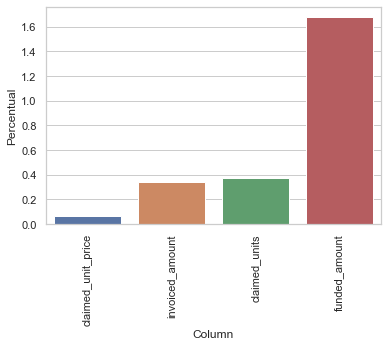

                    Percentual              Column
Name                                              
claimed_unit_price    0.063152  claimed_unit_price
invoiced_amount       0.339723     invoiced_amount
claimed_units         0.372195       claimed_units
funded_amount         1.680029       funded_amount
None


In [25]:
# Check if there any Nan Field
print(plotNaNValuesColums(invoices_claims_last_actived))

In [26]:
# Check some invoiced_amount and invoiced_amount NaN Data to
#  Check these data have in commum
df_invoiced_units_NaN = invoices_claims_last_actived.loc[invoices_claims_last_actived['funded_amount'].isna()]
df_invoiced_units_NaN

,funded_amount,claimed_units,claim_level2_key,member_id,invoiced_amount,invoice_id,claim_start_date,claim_end_date,claim_id,claim_level1_key,invoice_state,claim_level3_key,claimed_unit_price,updated_at,claim_state
560,NaN,1.0,7d0af57b-f597-11e9-bfb4-022d4762bb3c,195,193.990,1685,2020-07-08,2020-07-08,2660,5874551b-f597-11e9-bfb4-022d4762bb3c,PENDING_APPROVAL,85e9e810-754f-11ea-ade9-022376bbb7c0,193.99,2020-07-09 02:08:38,PENDING_APPROVAL
4355,NaN,8.0,7d0af53b-f597-11e9-bfb4-022d4762bb3c,600,434.400,19529,2020-07-06,2020-07-06,31321,58745466-f597-11e9-bfb4-022d4762bb3c,INVOICE_REJECTED,2d00284b-754f-11ea-ade9-022376bbb7c0,54.30,2021-04-06 17:54:18,OPERATOR_REJECTED
4356,NaN,1.0,7d0af71b-f597-11e9-bfb4-022d4762bb3c,600,1500.000,19529,2020-07-07,2020-07-07,31322,58745466-f597-11e9-bfb4-022d4762bb3c,INVOICE_REJECTED,2d0020b4-754f-11ea-ade9-022376bbb7c0,1.00,2021-04-06 17:54:18,OPERATOR_REJECTED
5218,NaN,1.0,7d0af57b-f597-11e9-bfb4-022d4762bb3c,846,125.240,21023,2020-07-24,2020-07-24,33762,5874551b-f597-11e9-bfb4-022d4762bb3c,INVOICE_REJECTED,85e9e8b9-754f-11ea-ade9-022376bbb7c0,125.24,2021-04-06 17:59:32,MEMBER_REJECTED
5493,NaN,1.0,7d0af57b-f597-11e9-bfb4-022d4762bb3c,575,97.000,21211,2020-07-21,2020-07-21,34039,5874551b-f597-11e9-bfb4-022d4762bb3c,INVOICE_REJECTED,85e9e810-754f-11ea-ade9-022376bbb7c0,97.00,2021-04-06 18:00:21,MEMBER_REJECTED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446535,NaN,0.5,7d0af57b-f597-11e9-bfb4-022d4762bb3c,4516,62.025,539305,2020-12-22,2020-12-22,1006084,5874551b-f597-11e9-bfb4-022d4762bb3c,PENDING_CLAIM,2d006104-754f-11ea-ade9-022376bbb7c0,124.05,2021-04-19 09:10:33,OPERATOR_AUTHORIZED
446536,NaN,0.5,7d0af57b-f597-11e9-bfb4-022d4762bb3c,4516,62.025,539306,2020-12-23,2020-12-23,1006085,5874551b-f597-11e9-bfb4-022d4762bb3c,PENDING_CLAIM,2d006104-754f-11ea-ade9-022376bbb7c0,124.05,2021-04-19 09:11:05,OPERATOR_AUTHORIZED
446537,NaN,2.0,7d0af57b-f597-11e9-bfb4-022d4762bb3c,4516,248.100,539307,2020-12-22,2020-12-22,1006086,5874551b-f597-11e9-bfb4-022d4762bb3c,PENDING_CLAIM,2d006104-754f-11ea-ade9-022376bbb7c0,124.05,2021-04-19 09:11:31,OPERATOR_AUTHORIZED
446538,NaN,1.0,7d0af57b-f597-11e9-bfb4-022d4762bb3c,5433,190.000,539308,2021-04-15,2021-04-15,1006087,5874551b-f597-11e9-bfb4-022d4762bb3c,PENDING_CLAIM,85e9e810-754f-11ea-ade9-022376bbb7c0,190.00,2021-04-19 09:12:49,OPERATOR_AUTHORIZED


In [27]:
# Group the state of invoice and claim of all null data
#  And Keeps these records
#   Because if 'funded_amount' is NaN means the claims is not PAID OR REFUNDED
df_invoiced_units_NaN[{"invoice_state"
                     , "claim_state"
                      }].groupby(["invoice_state"
                                , "claim_state"
                                 ]).count()

Empty DataFrame
Columns: []
Index: [(ALL_APPROVED, NOT_CLAIMABLE), (ALL_PAID, CANCELLED), (ALL_PAID, NOT_CLAIMABLE), (ALL_PAID, PAID), (CANCELLED, CANCELLED), (DRAFT_INVOICE, DRAFT_CLAIM), (INVOICE_REJECTED, MEMBER_REJECTED), (INVOICE_REJECTED, NOT_CLAIMABLE), (INVOICE_REJECTED, OPERATOR_REJECTED), (NOT_CLAIMABLE, NOT_CLAIMABLE), (PENDING_APPROVAL, PENDING_APPROVAL), (PENDING_CLAIM, OPERATOR_AUTHORIZED), (PENDING_REVIEW, CANCELLED), (PENDING_REVIEW, PENDING_REVIEW)]

In [28]:
# As seeing above some invoices stated ALL_PAID and PAID are also funded_amount NaN
# Check The NaN fields
len(invoices_claims_last_actived[(invoices_claims_last_actived['funded_amount'].isna())
                               & (invoices_claims_last_actived['invoice_state'] == 'ALL_PAID')
                               & (invoices_claims_last_actived['claim_state'] == 'PAID')
                                ]
   )

15

In [29]:
df_invoiced_units_not_NaN = invoices_claims_last_actived.loc[invoices_claims_last_actived['funded_amount'].notna()]

# Group the state of invoice and claim of not NaN
df_invoiced_units_not_NaN[{"invoice_state"
                         , "claim_state"
                          }].groupby(["invoice_state"
                                    , "claim_state"
                                     ]).count()

Empty DataFrame
Columns: []
Index: [(ALL_APPROVED, PENDING_DISBURSEMENT), (ALL_APPROVED, SCHEME_AUTHORIZED), (ALL_PAID, CANCELLED), (ALL_PAID, NOT_CLAIMABLE), (ALL_PAID, OPERATOR_REJECTED), (ALL_PAID, PAID), (ALL_PAID, SCHEME_REJECTED), (CANCELLED, CANCELLED), (DEED_ERROR_REVIEW_ALL, PENDING_DISBURSEMENT), (FULLY_REFUNDED, NOT_CLAIMABLE), (FULLY_REFUNDED, REFUNDED), (FULLY_REFUNDED, SCHEME_REJECTED), (INVOICE_REJECTED, NOT_CLAIMABLE), (INVOICE_REJECTED, OPERATOR_REJECTED), (INVOICE_REJECTED, SCHEME_REJECTED), (NOT_CLAIMABLE, NOT_CLAIMABLE), (PARTIALLY_APPROVED, PENDING_DISBURSEMENT), (PARTIALLY_APPROVED, SCHEME_REJECTED), (PARTIALLY_REFUNDED, CANCELLED), (PARTIALLY_REFUNDED, PAID), (PARTIALLY_REFUNDED, REFUNDED), (PART_PAID, CANCELLED), (PART_PAID, NOT_CLAIMABLE), (PART_PAID, OPERATOR_REJECTED), (PART_PAID, PAID), (PART_PAID, SCHEME_REJECTED), (PENDING_CANCELLATION, PENDING_CANCELLATION), (PENDING_CANCELLATION, SCHEME_REJECTED), (PENDING_CLAIM, OPERATOR_AUTHORIZED), (PENDING_CLAIM, PAID), (PENDING_REFUND, PAID), (PENDING_REFUND, PENDING_REFUND), (SHORT_PAID, CANCELLED), (SHORT_PAID, NOT_CLAIMABLE), (SHORT_PAID, OPERATOR_REJECTED), (SHORT_PAID, PAID), (SHORT_PAYMENT_APPROVED, PENDING_DISBURSEMENT), (SHORT_PAYMENT_APPROVED, SCHEME_AUTHORIZED)]

In [30]:
df_invoiced_units_not_NaN[{'claim_id'
                        , 'invoice_id'
                        , 'invoice_id'
                        , 'funded_amount'
                        , 'invoice_state'
                        , 'claim_state'
                        }].loc[((df_invoiced_units_not_NaN['invoice_state'] == 'ALL_APPROVED') | (df_invoiced_units_not_NaN['invoice_state'] == 'ALL_PAID' ))
                             & ((df_invoiced_units_not_NaN['claim_state'] != 'PAID'))
                             ]

,invoice_id,funded_amount,claim_id,invoice_state,claim_state
440,1804,0.00,2851,ALL_PAID,NOT_CLAIMABLE
442,1804,0.00,2853,ALL_PAID,NOT_CLAIMABLE
490,1841,0.00,2906,ALL_PAID,NOT_CLAIMABLE
613,1928,0.00,3025,ALL_PAID,NOT_CLAIMABLE
1191,10173,123.52,8720,ALL_PAID,CANCELLED
...,...,...,...,...,...
446250,538852,375.70,1005326,ALL_APPROVED,SCHEME_AUTHORIZED
446251,538853,145.00,1005327,ALL_APPROVED,SCHEME_AUTHORIZED
446252,538856,387.98,1005331,ALL_APPROVED,SCHEME_AUTHORIZED
446253,538858,156.16,1005334,ALL_APPROVED,SCHEME_AUTHORIZED


In [31]:
invoices_claims_last_actived['funded_amount'].loc[((invoices_claims_last_actived['invoice_state'] == 'ALL_APPROVED') | (invoices_claims_last_actived['invoice_state'] == 'ALL_PAID' ))
                                                 & (invoices_claims_last_actived['claim_state'] != 'PAID')
                                                 & (invoices_claims_last_actived['claim_state'] != 'PAID') 
                                                 & ( invoices_claims_last_actived['funded_amount'].notna()) 
                                                 ] = np.nan

C:\Users\dttt1\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [32]:
df_null_funded_amount =  invoices_claims_last_actived[(invoices_claims_last_actived['funded_amount'].isna())
                                                    & (invoices_claims_last_actived['invoice_state'] == 'ALL_PAID')
                                                    & (invoices_claims_last_actived['claim_state'] == 'PAID')
                                                     ]

# Fixes The funded_amount NaN in invoice_state = ALL_PAID and claim_state = PAID
df_null_funded_amount['funded_amount'] = df_null_funded_amount['claimed_unit_price'].astype(float) * df_null_funded_amount['claimed_units'].astype(float)

invoices_claims_last_actived = invoices_claims_last_actived.set_index('claim_id')
invoices_claims_last_actived.update(df_null_funded_amount.set_index('claim_id'))
invoices_claims_last_actived.reset_index(inplace=True)                                   

<ipython-input-32-b00eb68bc11b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null_funded_amount['funded_amount'] = df_null_funded_amount['claimed_unit_price'].astype(float) * df_null_funded_amount['claimed_units'].astype(float)


In [33]:
invoices_claims_last_actived['updated_at'] = pd.to_datetime(invoices_claims_last_actived['updated_at']).dt.strftime('%Y-%m-%d')

In [34]:
# Group the invoices from their claims
invoices_claims_last_actived_cleased = invoices_claims_last_actived.groupby(["member_id"
                                                                           , "invoice_state"
                                                                           , "updated_at"
                                                                           , "claim_state"
                                                                           , "claim_level1_key"
                                                                           , "claim_level2_key"
                                                                           , "claim_level3_key"]).agg({"invoiced_amount": "sum", "funded_amount": "sum"}).reset_index()

### Invoice and claims dataset From LAST COMPLETED plan

In [35]:
# Check the dataSet fields
invoices_claims_last_completed_all_fields.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233380 entries, 0 to 233379
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   member_id            233380 non-null  int64  
 1   invoice_state        233380 non-null  object 
 2   updated_at           233380 non-null  object 
 3   invoiced_amount      232765 non-null  float64
 4   invoice_id           233380 non-null  int64  
 5   claim_id             233380 non-null  int64  
 6   claim_start_date     233380 non-null  object 
 7   claim_end_date       233380 non-null  object 
 8   claim_state          233380 non-null  object 
 9   claim_funded_amount  232483 non-null  float64
 10  claimed_units        232748 non-null  float64
 11  claimed_unit_price   233316 non-null  float64
 12  key                  233380 non-null  object 
 13  key.1                233380 non-null  object 
 14  key.2                233380 non-null  object 
dtypes: float64(4), in

In [36]:
invoices_claims_last_completed_all_fields.head(4)

,member_id,invoice_state,updated_at,invoiced_amount,invoice_id,claim_id,claim_start_date,claim_end_date,claim_state,claim_funded_amount,claimed_units,claimed_unit_price,key,key.1,key.2
0,15,ALL_PAID,2021-04-06 16:54:08,29.00,58,30,2020-03-20,2020-03-20,PAID,29.00,1.0,29.00,2d00284b-754f-11ea-ade9-022376bbb7c0,7d0af53b-f597-11e9-bfb4-022d4762bb3c,58745466-f597-11e9-bfb4-022d4762bb3c
1,15,ALL_PAID,2021-04-06 16:13:00,823.34,82,32,2019-11-23,2019-11-23,PAID,823.34,14.0,58.81,2d001ca0-754f-11ea-ade9-022376bbb7c0,7d0af71b-f597-11e9-bfb4-022d4762bb3c,58745466-f597-11e9-bfb4-022d4762bb3c
2,15,ALL_PAID,2021-04-06 16:59:43,130.00,41,33,2020-04-08,2020-04-08,PAID,130.00,2.6,50.00,2d001d20-754f-11ea-ade9-022376bbb7c0,7d0af71b-f597-11e9-bfb4-022d4762bb3c,58745466-f597-11e9-bfb4-022d4762bb3c
3,15,ALL_PAID,2021-04-06 15:45:23,104.49,79,34,2019-10-01,2019-10-01,PAID,79.94,1.0,104.49,2d001d6a-754f-11ea-ade9-022376bbb7c0,7d0af71b-f597-11e9-bfb4-022d4762bb3c,58745466-f597-11e9-bfb4-022d4762bb3c


In [37]:
# Select just the fields to be used
invoices_claims_last_completed = invoices_claims_last_completed_all_fields[{"member_id"
                                                                          , "invoice_state"
                                                                          , "invoice_id"
                                                                          , "updated_at"
                                                                          , "claim_state"
                                                                          , "claim_id"
                                                                          , "key"  
                                                                          , "key.1"
                                                                          , "key.2"
                                                                          , "claim_start_date"
                                                                          , "claim_end_date"
                                                                          , "claim_funded_amount"
                                                                          , "invoiced_amount"
                                                                          , "claimed_units"
                                                                          , "claimed_unit_price"
                                                                      }]

# Rename some dataSet colums to create a name's pattern
invoices_claims_last_completed.rename(columns={'claim_funded_amount':'funded_amount'
                                             , 'claimed__units_price':'claimed__units_amount'  
                                             , 'key.1':'claim_level2_key'
                                             , 'key.2':'claim_level1_key'
                                             , 'key':'claim_level3_key'
                                              } , inplace = True) 

In [38]:
# Check the claim_state To check whether there is any dump value
invoices_claims_last_completed['claim_state'].unique()

array(['PAID', 'CANCELLED', 'REFUNDED', 'SCHEME_REJECTED',
       'NOT_CLAIMABLE', 'PENDING_REFUND', 'OPERATOR_REJECTED',
       'MEMBER_REJECTED', 'PENDING_APPROVAL', 'PENDING_DISBURSEMENT',
       'SCHEME_AUTHORIZED'], dtype=object)

In [39]:
# Check the claim_state To check whether there is any dump value
invoices_claims_last_completed['invoice_state'].unique()

array(['ALL_PAID', 'SHORT_PAID', 'CANCELLED', 'FULLY_REFUNDED',
       'INVOICE_REJECTED', 'PART_PAID', 'PENDING_REFUND', 'NOT_CLAIMABLE',
       'PARTIALLY_APPROVED', 'SHORT_PAYMENT_APPROVED', 'PENDING_REVIEW',
       'PARTIALLY_REFUNDED', 'PENDING_APPROVAL', 'ALL_APPROVED'],
      dtype=object)

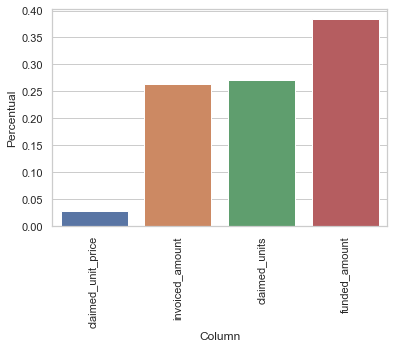

                    Percentual              Column
Name                                              
claimed_unit_price    0.027423  claimed_unit_price
invoiced_amount       0.263519     invoiced_amount
claimed_units         0.270803       claimed_units
funded_amount         0.384352       funded_amount
None


In [40]:
# Check if there any Nan Field
print(plotNaNValuesColums(invoices_claims_last_completed))

In [41]:
# Check some invoiced_amount and invoiced_amount NaN Data to
#  Check these data have in commum
df_invoiced_units_NaN = invoices_claims_last_completed.loc[invoices_claims_last_completed['funded_amount'].isna()]
df_invoiced_units_NaN

,funded_amount,claimed_units,claim_level2_key,member_id,invoiced_amount,invoice_id,claim_start_date,claim_end_date,claim_id,claim_level1_key,invoice_state,claim_level3_key,claimed_unit_price,updated_at,claim_state
106,NaN,1.0,7d0af71b-f597-11e9-bfb4-022d4762bb3c,21,1.00,825,2020-06-25,2020-06-25,1081,58745466-f597-11e9-bfb4-022d4762bb3c,CANCELLED,2d001c6e-754f-11ea-ade9-022376bbb7c0,1.00,2021-04-06 17:41:23,CANCELLED
895,NaN,8.0,7d0af71b-f597-11e9-bfb4-022d4762bb3c,262,386.24,1724,2020-06-08,2020-06-08,2717,58745466-f597-11e9-bfb4-022d4762bb3c,CANCELLED,2d001d20-754f-11ea-ade9-022376bbb7c0,48.28,2021-04-06 17:50:24,CANCELLED
18286,NaN,4.0,7d0af53b-f597-11e9-bfb4-022d4762bb3c,658,300.00,19626,2020-05-23,2020-05-23,31479,58745466-f597-11e9-bfb4-022d4762bb3c,INVOICE_REJECTED,2d002864-754f-11ea-ade9-022376bbb7c0,75.00,2021-04-06 17:54:51,OPERATOR_REJECTED
18287,NaN,4.0,7d0af53b-f597-11e9-bfb4-022d4762bb3c,658,380.00,19626,2020-05-24,2020-05-24,31480,58745466-f597-11e9-bfb4-022d4762bb3c,INVOICE_REJECTED,2d00287d-754f-11ea-ade9-022376bbb7c0,95.00,2021-04-06 17:54:51,OPERATOR_REJECTED
19351,NaN,4.0,7d0af53b-f597-11e9-bfb4-022d4762bb3c,1087,249.96,20911,2020-06-10,2020-06-12,33585,58745466-f597-11e9-bfb4-022d4762bb3c,CANCELLED,85e98f73-754f-11ea-ade9-022376bbb7c0,62.49,2021-04-06 17:59:05,CANCELLED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231700,NaN,20.0,7d0af71b-f597-11e9-bfb4-022d4762bb3c,3549,62.00,495718,2021-03-08,2021-03-12,917898,58745466-f597-11e9-bfb4-022d4762bb3c,CANCELLED,2d001d52-754f-11ea-ade9-022376bbb7c0,3.10,2021-04-06 22:56:28,CANCELLED
231987,NaN,0.0,7d0af53b-f597-11e9-bfb4-022d4762bb3c,533,0.00,499934,2021-03-11,2021-03-11,926602,58745466-f597-11e9-bfb4-022d4762bb3c,ALL_PAID,2d0032cb-754f-11ea-ade9-022376bbb7c0,55.47,2021-04-06 22:59:41,NOT_CLAIMABLE
231992,NaN,2.0,7d0af71b-f597-11e9-bfb4-022d4762bb3c,359,98.60,500343,2021-03-18,2021-03-18,927262,58745466-f597-11e9-bfb4-022d4762bb3c,INVOICE_REJECTED,2d001d20-754f-11ea-ade9-022376bbb7c0,49.30,2021-04-06 22:59:59,MEMBER_REJECTED
232644,NaN,0.0,7d0af53b-f597-11e9-bfb4-022d4762bb3c,533,0.00,511380,2021-03-16,2021-03-16,948762,58745466-f597-11e9-bfb4-022d4762bb3c,ALL_PAID,2d00284b-754f-11ea-ade9-022376bbb7c0,55.47,2021-04-06 23:08:26,NOT_CLAIMABLE


In [42]:
df_null_funded_amount =  invoices_claims_last_completed[(invoices_claims_last_completed['funded_amount'].isna())
                                                      & (invoices_claims_last_completed['invoice_state'] == 'ALL_PAID')
                                                      & (invoices_claims_last_completed['claim_state'] == 'PAID')
                                                     ]

# Fixes The funded_amount NaN in invoice_state = ALL_PAID and claim_state = PAID
df_null_funded_amount['funded_amount'] = df_null_funded_amount['claimed_unit_price'].astype(float) * df_null_funded_amount['claimed_units'].astype(float)


invoices_claims_last_completed = invoices_claims_last_completed.set_index('claim_id')
invoices_claims_last_completed.update(df_null_funded_amount.set_index('claim_id'))
invoices_claims_last_completed.reset_index(inplace=True)    

In [43]:
# Group the state of invoice and claim of all null data
#  And Keeps these records
#   Because if 'funded_amount' is NaN means the claims is not PAID OR REFUNDED
df_invoiced_units_NaN[{"invoice_state"
                     , "claim_state"
                      }].groupby(["invoice_state"
                                , "claim_state"
                                 ]).count()

Empty DataFrame
Columns: []
Index: [(ALL_PAID, NOT_CLAIMABLE), (CANCELLED, CANCELLED), (INVOICE_REJECTED, MEMBER_REJECTED), (INVOICE_REJECTED, NOT_CLAIMABLE), (INVOICE_REJECTED, OPERATOR_REJECTED), (NOT_CLAIMABLE, NOT_CLAIMABLE), (PENDING_APPROVAL, PENDING_APPROVAL), (PENDING_REVIEW, CANCELLED)]

In [44]:
# As seeing above some invoices stated ALL_PAID and PAID are also funded_amount NaN
# Check The NaN fields
len(invoices_claims_last_completed[(invoices_claims_last_completed['funded_amount'].isna())
                                 & (invoices_claims_last_completed['invoice_state'] == 'ALL_PAID')
                                 & (invoices_claims_last_completed['claim_state'] == 'PAID')
                                ]
   )

0

In [45]:
df_invoiced_units_not_NaN = invoices_claims_last_completed.loc[invoices_claims_last_completed['funded_amount'].notna()]

# Group the state of invoice and claim of not NaN
df_invoiced_units_not_NaN[{"invoice_state"
                         , "claim_state"
                          }].groupby(["invoice_state"
                                    , "claim_state"
                                     ]).count()

Empty DataFrame
Columns: []
Index: [(ALL_APPROVED, PAID), (ALL_APPROVED, PENDING_DISBURSEMENT), (ALL_APPROVED, SCHEME_AUTHORIZED), (ALL_PAID, CANCELLED), (ALL_PAID, NOT_CLAIMABLE), (ALL_PAID, OPERATOR_REJECTED), (ALL_PAID, PAID), (ALL_PAID, SCHEME_REJECTED), (CANCELLED, CANCELLED), (CANCELLED, NOT_CLAIMABLE), (FULLY_REFUNDED, NOT_CLAIMABLE), (FULLY_REFUNDED, REFUNDED), (FULLY_REFUNDED, SCHEME_REJECTED), (INVOICE_REJECTED, NOT_CLAIMABLE), (INVOICE_REJECTED, OPERATOR_REJECTED), (INVOICE_REJECTED, SCHEME_REJECTED), (NOT_CLAIMABLE, NOT_CLAIMABLE), (PARTIALLY_APPROVED, PAID), (PARTIALLY_APPROVED, SCHEME_REJECTED), (PARTIALLY_REFUNDED, CANCELLED), (PARTIALLY_REFUNDED, PAID), (PARTIALLY_REFUNDED, REFUNDED), (PART_PAID, CANCELLED), (PART_PAID, NOT_CLAIMABLE), (PART_PAID, OPERATOR_REJECTED), (PART_PAID, PAID), (PART_PAID, SCHEME_REJECTED), (PENDING_REFUND, PAID), (PENDING_REFUND, PENDING_REFUND), (PENDING_REFUND, SCHEME_REJECTED), (SHORT_PAID, CANCELLED), (SHORT_PAID, OPERATOR_REJECTED), (SHORT_PAID, PAID), (SHORT_PAID, SCHEME_REJECTED), (SHORT_PAYMENT_APPROVED, PAID)]

In [46]:
df_invoiced_units_not_NaN[{'claim_id'
                        , 'invoice_id'
                        , 'invoice_id'
                        , 'funded_amount'
                        , 'invoice_state'
                        , 'claim_state'
                        }].loc[((df_invoiced_units_not_NaN['invoice_state'] == 'ALL_APPROVED') | (df_invoiced_units_not_NaN['invoice_state'] == 'ALL_PAID' ))
                             & ((df_invoiced_units_not_NaN['claim_state'] != 'PAID'))
                             ]

,invoice_id,funded_amount,claim_id,invoice_state,claim_state
19383,20212,0.00,32443,ALL_PAID,NOT_CLAIMABLE
19384,20212,0.00,32444,ALL_PAID,NOT_CLAIMABLE
21712,25881,0.00,43003,ALL_PAID,SCHEME_REJECTED
31194,47477,0.00,75874,ALL_PAID,SCHEME_REJECTED
45442,62947,0.00,101231,ALL_PAID,OPERATOR_REJECTED
...,...,...,...,...,...
233375,535282,775.96,997155,ALL_APPROVED,PENDING_DISBURSEMENT
233376,535849,190.00,998291,ALL_APPROVED,PENDING_DISBURSEMENT
233377,536383,380.10,999403,ALL_APPROVED,PENDING_DISBURSEMENT
233378,536829,240.00,1000311,ALL_APPROVED,PENDING_DISBURSEMENT


In [47]:
invoices_claims_last_completed['funded_amount'].loc[((invoices_claims_last_completed['invoice_state'] == 'ALL_APPROVED') | (invoices_claims_last_completed['invoice_state'] == 'ALL_PAID' ))
                              & (invoices_claims_last_completed['claim_state'] != 'PAID')
                              &  (invoices_claims_last_completed['claim_state'] != 'PAID') 
                              &  ( invoices_claims_last_completed['funded_amount'].notna()) 
                             ] = np.nan

C:\Users\dttt1\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [48]:
invoices_claims_last_completed['updated_at'] = pd.to_datetime(invoices_claims_last_completed['updated_at']).dt.strftime('%Y-%m-%d')

In [49]:
# Group the invoices from their claims
invoices_claims_last_completed_cleased = invoices_claims_last_completed.groupby(["member_id"
                                                                               , "invoice_state"
                                                                               , "updated_at" 
                                                                               , "claim_state"
                                                                               , "claim_level1_key"
                                                                               , "claim_level2_key"
                                                                               , "claim_level3_key"]).agg({"invoiced_amount": "sum", "funded_amount": "sum"}).reset_index()

### Merge dataSets cleased

### Merges members dataSet with plans and budgets dataSet

In [50]:
# Member dataSet with plans and budgets dataSet
df_members_plans_budgets_merged = pd.merge(df_members_cleased, df_plans_budgets_cleased, on=["member_key", "member_key"])

### Merges last COMPLETED plan with members plans budgets merged dataSet

In [51]:
df_members_plans_completed = df_members_plans_budgets_merged.loc[df_members_plans_budgets_merged['plan_status'] == 'COMPLETED']

invoices_completed_merged = df_members_plans_completed.merge(invoices_claims_last_completed_cleased, on='member_id')

invoices_claims_plan_completed_merged = invoices_completed_merged.loc[

                                    (
                                         ((invoices_completed_merged['budget_level3_key'] == 'NA')
                                        & (invoices_completed_merged['budget_level2_key'] ==  invoices_completed_merged['claim_level2_key']) 
                                        & (invoices_completed_merged['budget_level1_key'] ==  invoices_completed_merged['claim_level1_key'])   
                                          )

                                        
                                    )

                                    |

                                    (
      
                                          (invoices_completed_merged['budget_level3_key'] != 'NA')
                                        & (invoices_completed_merged['budget_level3_key'] == invoices_completed_merged['claim_level3_key'] )
                                        & (invoices_completed_merged['budget_level2_key'] == invoices_completed_merged['claim_level2_key'] )
                                        & (invoices_completed_merged['budget_level1_key'] == invoices_completed_merged['claim_level1_key'] )
                                    )


                                ]

### Merges last PLAN_DELIVERY_ACTIVED plan with members plans budgets merged dataSet

In [52]:
df_members_plans_actived = df_members_plans_budgets_merged.loc[df_members_plans_budgets_merged['plan_status'] == 'PLAN_DELIVERY_ACTIVE']

invoices_actived_merged = df_members_plans_actived.merge(invoices_claims_last_actived_cleased, on='member_id')

invoices_claims_plan_actived_merged = invoices_actived_merged.loc[

                                    (
                                         ((invoices_actived_merged['budget_level3_key'] == 'NA')
                                        & (invoices_actived_merged['budget_level2_key'] ==  invoices_actived_merged['claim_level2_key']) 
                                        & (invoices_actived_merged['budget_level1_key'] ==  invoices_actived_merged['claim_level1_key'])   
                                          )

                                        
                                    )

                                    |

                                    (
      
                                          (invoices_actived_merged['budget_level3_key'] != 'NA')
                                        & (invoices_actived_merged['budget_level3_key'] == invoices_actived_merged['claim_level3_key'] )
                                        & (invoices_actived_merged['budget_level2_key'] == invoices_actived_merged['claim_level2_key'] )
                                        & (invoices_actived_merged['budget_level1_key'] == invoices_actived_merged['claim_level1_key'] )
                                    )


                                ]

### Merges last COMPLETED plan dataSet with PLAN_DELIVERY_ACTIVED plan

In [53]:
frames = [invoices_claims_plan_actived_merged, invoices_claims_plan_completed_merged]
invoices_claims_merged = pd.concat(frames)

invoices_claims_merged.rename(columns={
                                      'invoiced_amount':'requested_amount'
                                    , 'budget_amount':'allocated_amount'
                                      } , inplace = True)

In [54]:
invoices_claims_merged.rename(columns={'invoiced_amount':'requested_amount'
                                      } , inplace = True)

invoices_claims_merged['updated_at'] = pd.to_datetime(invoices_claims_merged['updated_at']).dt.strftime('%Y-%m')
invoices_claims_merged['plan_start_date'] = pd.to_datetime(invoices_claims_merged['plan_start_date']).dt.strftime('%Y-%m')
invoices_claims_merged['plan_end_date'] = pd.to_datetime(invoices_claims_merged['plan_end_date']).dt.strftime('%Y-%m')

In [55]:
df_merged = invoices_claims_merged.groupby(["member_key"
                                         , "updated_at"
                                         , "first_name"
                                         , "last_name"
                                         , "disabilities"
                                         , "SA1"
                                         , "price_zone_code"
                                         , "plan_key"
                                         , "plan_status"
                                         , "plan_start_date"
                                         , "plan_end_date"
                                         , "budget_level3_name"
                                         , "budget_level3_key"
                                         , "budget_level2_key"
                                         , "budget_level2_name"
                                         , "budget_level1_key"
                                         , "budget_level1_name"
                                         , "invoice_state"
                                         , "claim_state"
                                         , "allocated_amount"
                                          ]).agg({"requested_amount": "sum", "funded_amount": "sum"}).reset_index()                                          

In [56]:
df_total = df_merged.groupby(["member_key"
                                          ]).agg({"allocated_amount": "sum"
                                                , "requested_amount": "sum"
                                                , "funded_amount": "sum"}).reset_index()

In [57]:
df_total.rename(columns={'allocated_amount':'allocated_amount_total'
                        , 'requested_amount':'requested_amount_total'
                        , 'funded_amount':'funded_amount_total'
                        } , inplace = True)

df_model = df_merged.merge(df_total, on='member_key')

In [58]:
compression_opts = dict(method='zip',
                        archive_name='main.csv')

df_model.to_csv('../dataSets/main.zip', compression=compression_opts)